In [3]:
import numpy as np
import matplotlib.pyplot as plt
import lmfit

import dynamic

In [2]:
sequence =     [(550e-9, {'power':0}),
                 (6e-6, {'power': 'laser'}),
                 (1e-6, {'power':0}),
                 'pi',
                 (1e-6, {'power':0}),
                 (6e-6, {'power': 'laser'}),
                 (1.5e-6, {'power':0})]

In [4]:
model = lmfit.Parameters()
model.add('excitation_rate_over_power', value=9e+10)
model.add('pi_efficiency', value=0.9)
model.add('factor', value=1075858.95)
model.add('radiative_rate', value=65.9e6)
model.add('bg_over_power', value=5e+04/3e-03)  # from saturation curve

model.add('power', value=1)

model.add('k_0_2', expr='excitation_rate_over_power*power')
model.add('k_1_3', expr='excitation_rate_over_power*power')
model.add('k_2_0', expr='radiative_rate')
model.add('k_3_1', expr='radiative_rate')
model.add('k_2_4', value=11.4e6)
model.add('k_3_4', value=92.1e6)
model.add('k_4_0', value=4.87e6)
model.add('k_4_1', value=2.35e6)

In [19]:
dt = 1e-9

populations, keys_vs_times = dynamic.simulate_sequence(model, dt, sequence, get_from_recursive=True, laser=300e-6)

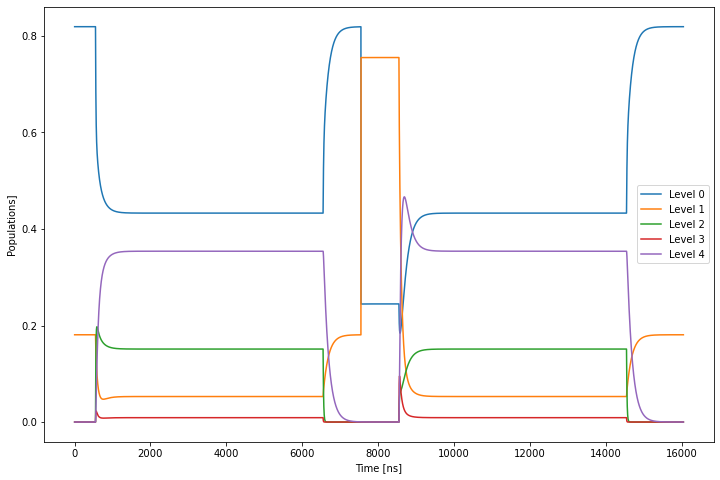

In [20]:
fig, ax = plt.subplots(figsize = (12,8))
ax.set_xlabel("Time [ns]")
ax.set_ylabel("Populations]")

times = np.arange(len(populations))*dt * 1e9

for i, population in enumerate(populations.T):
    ax.plot(times, population, label='Level {}'.format(i))
ax.legend()
pass

Now we compute the PL from the excited state levels and the background 

In [21]:
y = (populations[:, 2] + populations[:, 3]) * model['factor'].value
y += keys_vs_times['power'] * model['bg_over_power'].value

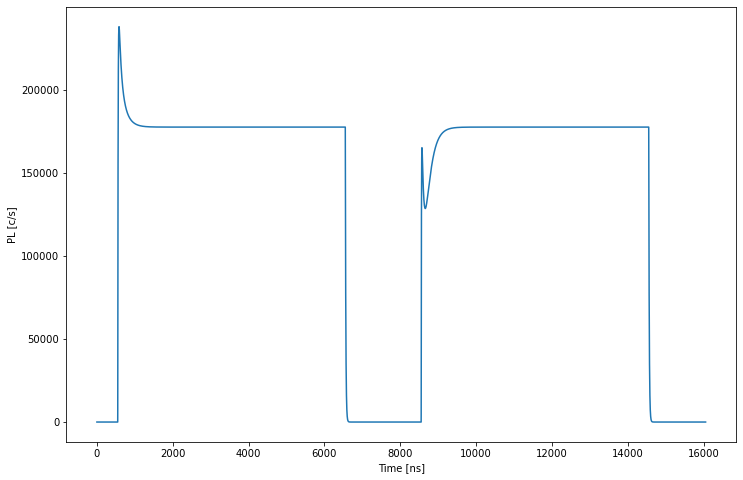

In [23]:
fig, ax = plt.subplots(figsize = (12,8))
ax.set_xlabel("Time [ns]")
ax.set_ylabel("PL [c/s]")

ax.plot(times, y)
pass